In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")
import os
os.chdir(r'C:\Users\Hp\Downloads\Forecasting')

In [2]:
train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
train_original=train.copy() 
test_original=test.copy()

In [6]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [7]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [8]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [9]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [10]:
train['Datetime']

0       2012-08-25 00:00:00
1       2012-08-25 01:00:00
2       2012-08-25 02:00:00
3       2012-08-25 03:00:00
4       2012-08-25 04:00:00
5       2012-08-25 05:00:00
6       2012-08-25 06:00:00
7       2012-08-25 07:00:00
8       2012-08-25 08:00:00
9       2012-08-25 09:00:00
10      2012-08-25 10:00:00
11      2012-08-25 11:00:00
12      2012-08-25 12:00:00
13      2012-08-25 13:00:00
14      2012-08-25 14:00:00
15      2012-08-25 15:00:00
16      2012-08-25 16:00:00
17      2012-08-25 17:00:00
18      2012-08-25 18:00:00
19      2012-08-25 19:00:00
20      2012-08-25 20:00:00
21      2012-08-25 21:00:00
22      2012-08-25 22:00:00
23      2012-08-25 23:00:00
24      2012-08-26 00:00:00
25      2012-08-26 01:00:00
26      2012-08-26 02:00:00
27      2012-08-26 03:00:00
28      2012-08-26 04:00:00
29      2012-08-26 05:00:00
                ...        
18258   2014-09-24 18:00:00
18259   2014-09-24 19:00:00
18260   2014-09-24 20:00:00
18261   2014-09-24 21:00:00
18262   2014-09-24 2

In [11]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [12]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [13]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [14]:
train.head(5)


,ID,Datetime,Count,year,month,day,Hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [15]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

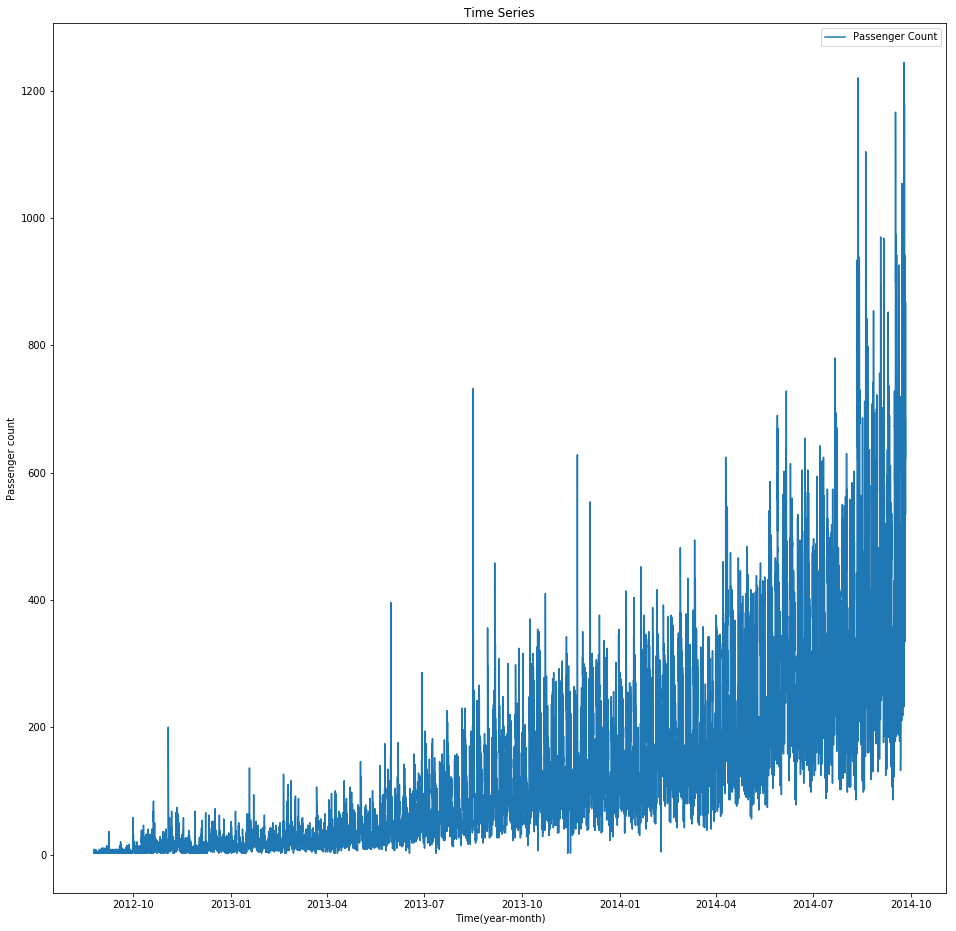

In [16]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,16)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

In [17]:
ts

Datetime
2012-08-25 00:00:00       8
2012-08-25 01:00:00       2
2012-08-25 02:00:00       6
2012-08-25 03:00:00       2
2012-08-25 04:00:00       2
2012-08-25 05:00:00       2
2012-08-25 06:00:00       2
2012-08-25 07:00:00       2
2012-08-25 08:00:00       6
2012-08-25 09:00:00       2
2012-08-25 10:00:00       2
2012-08-25 11:00:00       6
2012-08-25 12:00:00       4
2012-08-25 13:00:00       2
2012-08-25 14:00:00       6
2012-08-25 15:00:00       2
2012-08-25 16:00:00       2
2012-08-25 17:00:00       2
2012-08-25 18:00:00       2
2012-08-25 19:00:00       2
2012-08-25 20:00:00       2
2012-08-25 21:00:00       6
2012-08-25 22:00:00       2
2012-08-25 23:00:00       2
2012-08-26 00:00:00       4
2012-08-26 01:00:00       6
2012-08-26 02:00:00       2
2012-08-26 03:00:00       4
2012-08-26 04:00:00       2
2012-08-26 05:00:00       2
                       ... 
2014-09-24 18:00:00     966
2014-09-24 19:00:00    1178
2014-09-24 20:00:00    1008
2014-09-24 21:00:00     936
2014-09-24 

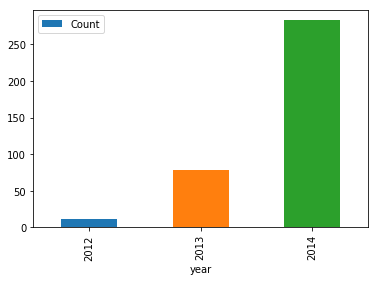

In [18]:
train.groupby('year')['Count'].mean().plot.bar()
plt.legend(loc='best') 

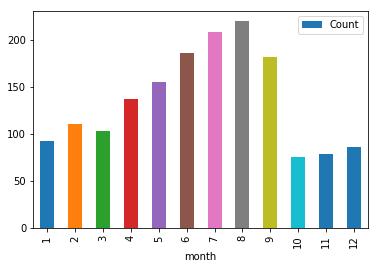

In [23]:
train.groupby('month')['Count'].mean().plot.bar()
plt.legend(loc='best') 

In [24]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


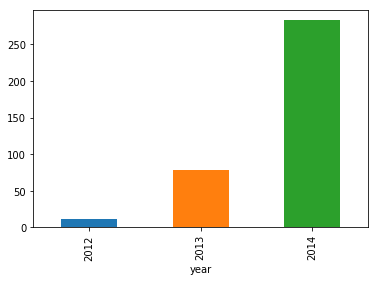

In [25]:
train.groupby('year')['Count'].mean().plot.bar()

In [26]:
temp

0       2012-08-25 00:00:00
1       2012-08-25 01:00:00
2       2012-08-25 02:00:00
3       2012-08-25 03:00:00
4       2012-08-25 04:00:00
5       2012-08-25 05:00:00
6       2012-08-25 06:00:00
7       2012-08-25 07:00:00
8       2012-08-25 08:00:00
9       2012-08-25 09:00:00
10      2012-08-25 10:00:00
11      2012-08-25 11:00:00
12      2012-08-25 12:00:00
13      2012-08-25 13:00:00
14      2012-08-25 14:00:00
15      2012-08-25 15:00:00
16      2012-08-25 16:00:00
17      2012-08-25 17:00:00
18      2012-08-25 18:00:00
19      2012-08-25 19:00:00
20      2012-08-25 20:00:00
21      2012-08-25 21:00:00
22      2012-08-25 22:00:00
23      2012-08-25 23:00:00
24      2012-08-26 00:00:00
25      2012-08-26 01:00:00
26      2012-08-26 02:00:00
27      2012-08-26 03:00:00
28      2012-08-26 04:00:00
29      2012-08-26 05:00:00
                ...        
18258   2014-09-24 18:00:00
18259   2014-09-24 19:00:00
18260   2014-09-24 20:00:00
18261   2014-09-24 21:00:00
18262   2014-09-24 2

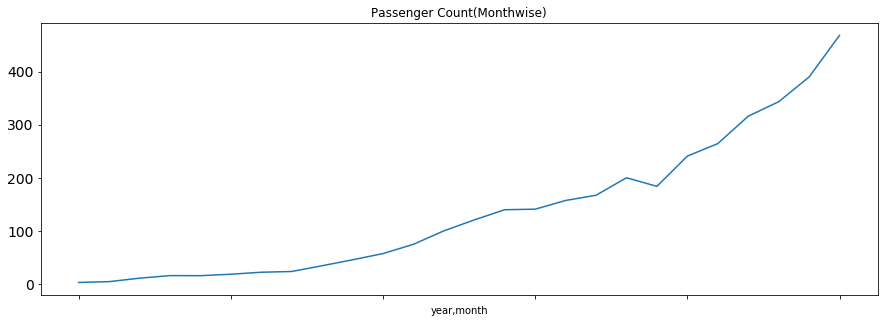

In [27]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

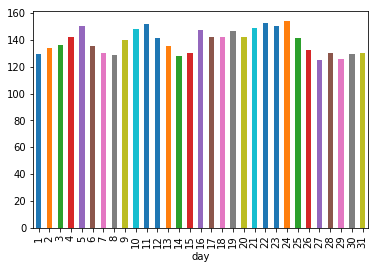

In [28]:
train.groupby('day')['Count'].mean().plot.bar()

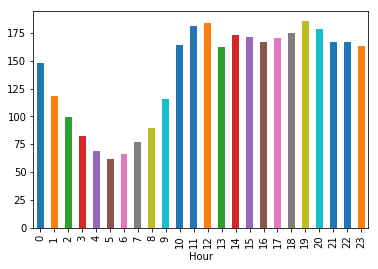

In [25]:
train.groupby('Hour')['Count'].mean().plot.bar()

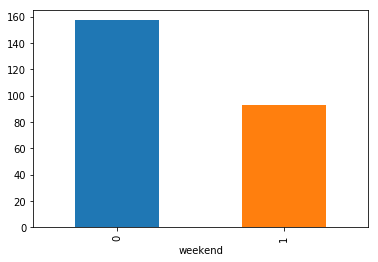

In [26]:
train.groupby('weekend')['Count'].mean().plot.bar()

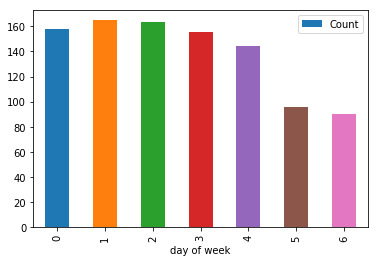

In [27]:
train.groupby('day of week')['Count'].mean().plot.bar()
plt.legend(loc='best') 

In [20]:
train=train.drop('ID',1)

In [21]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()


In [22]:
weekly

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-26,3.416667,2012.000000,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,3.345238,2012.000000,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,3.654762,2012.000000,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,3.119048,2012.000000,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,4.714286,2012.000000,9.000000,20.000000,11.5,3.0,0.285714
2012-09-30,6.190476,2012.000000,9.000000,27.000000,11.5,3.0,0.285714
2012-10-07,6.607143,2012.000000,10.000000,4.000000,11.5,3.0,0.285714
2012-10-14,10.357143,2012.000000,10.000000,11.000000,11.5,3.0,0.285714
2012-10-21,14.547619,2012.000000,10.000000,18.000000,11.5,3.0,0.285714


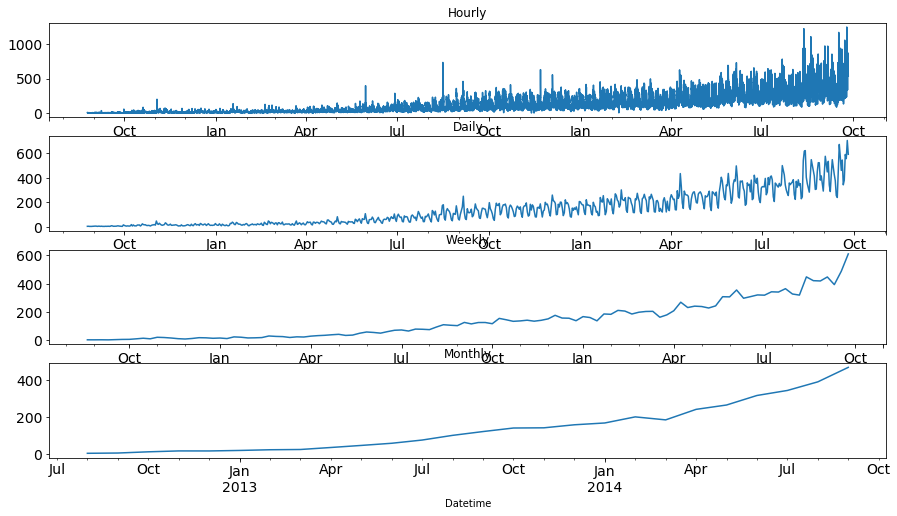

In [23]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 


We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [24]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

In [25]:
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']


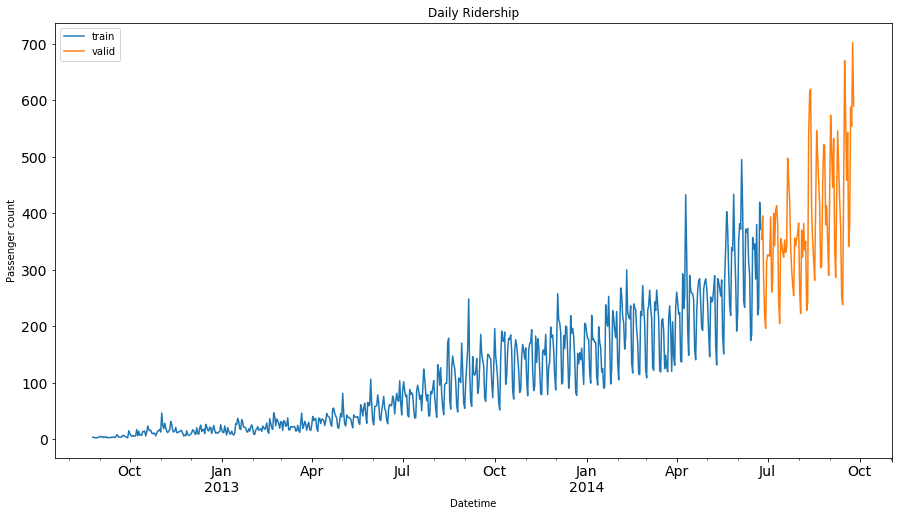

In [26]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

In [36]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 


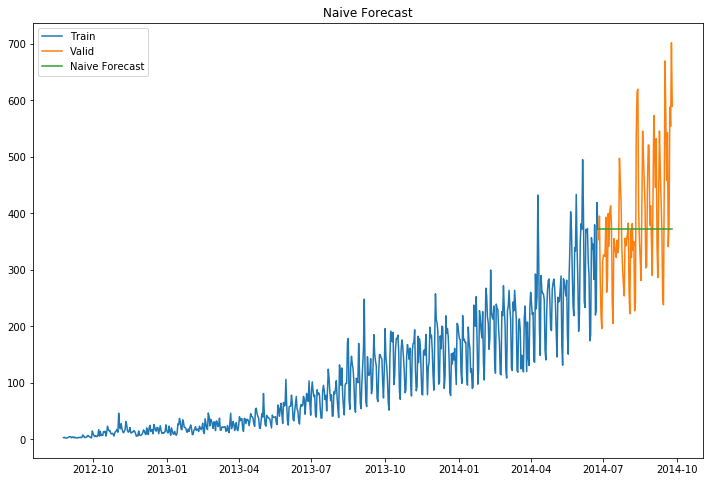

In [37]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


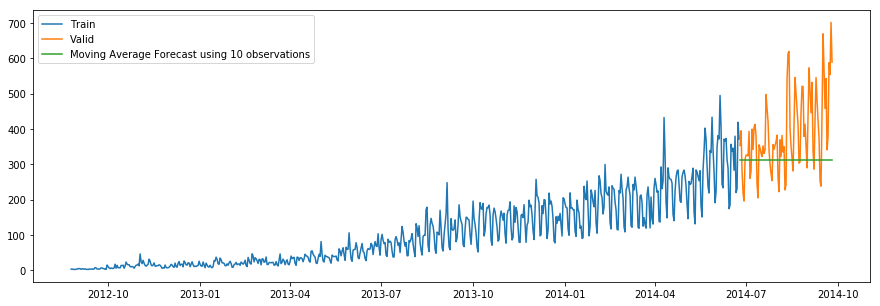

134.23733308950264


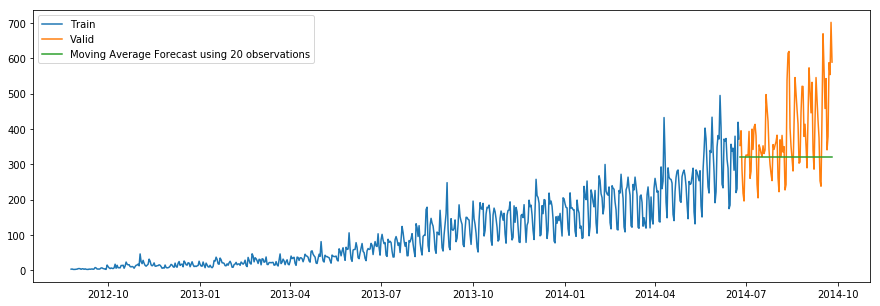

130.44984977550422


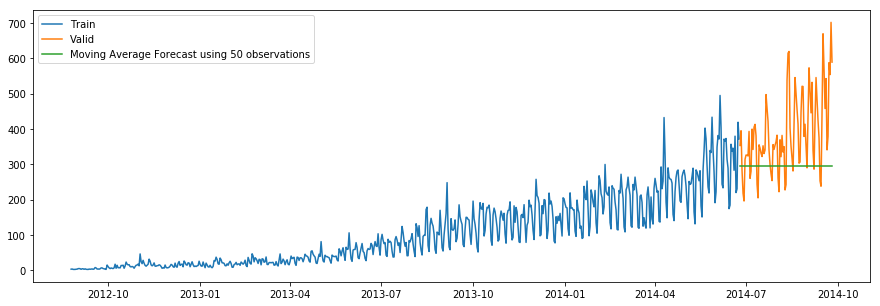

144.19175679986802


In [39]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

In [40]:
y_hat_avg

,Count,year,month,day,Hour,day of week,weekend,moving_avg_forecast
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,296.626667
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,296.626667
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,296.626667
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,296.626667
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,296.626667
2014-06-30,314.500000,2014.0,6.0,30.0,11.5,0.0,0.0,296.626667
2014-07-01,326.500000,2014.0,7.0,1.0,11.5,1.0,0.0,296.626667
2014-07-02,326.083333,2014.0,7.0,2.0,11.5,2.0,0.0,296.626667
2014-07-03,323.916667,2014.0,7.0,3.0,11.5,3.0,0.0,296.626667


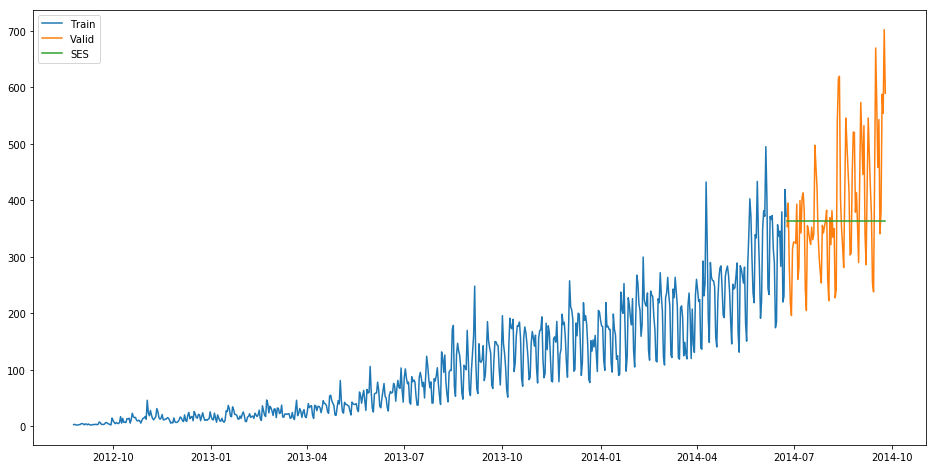

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [42]:
y_hat_avg['SES']

Datetime
2014-06-25    363.522492
2014-06-26    363.522492
2014-06-27    363.522492
2014-06-28    363.522492
2014-06-29    363.522492
2014-06-30    363.522492
2014-07-01    363.522492
2014-07-02    363.522492
2014-07-03    363.522492
2014-07-04    363.522492
2014-07-05    363.522492
2014-07-06    363.522492
2014-07-07    363.522492
2014-07-08    363.522492
2014-07-09    363.522492
2014-07-10    363.522492
2014-07-11    363.522492
2014-07-12    363.522492
2014-07-13    363.522492
2014-07-14    363.522492
2014-07-15    363.522492
2014-07-16    363.522492
2014-07-17    363.522492
2014-07-18    363.522492
2014-07-19    363.522492
2014-07-20    363.522492
2014-07-21    363.522492
2014-07-22    363.522492
2014-07-23    363.522492
2014-07-24    363.522492
                 ...    
2014-08-27    363.522492
2014-08-28    363.522492
2014-08-29    363.522492
2014-08-30    363.522492
2014-08-31    363.522492
2014-09-01    363.522492
2014-09-02    363.522492
2014-09-03    363.522492
2014-09-04    36

In [43]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)


113.43708111884514


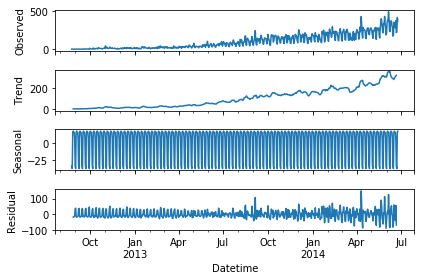

In [44]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

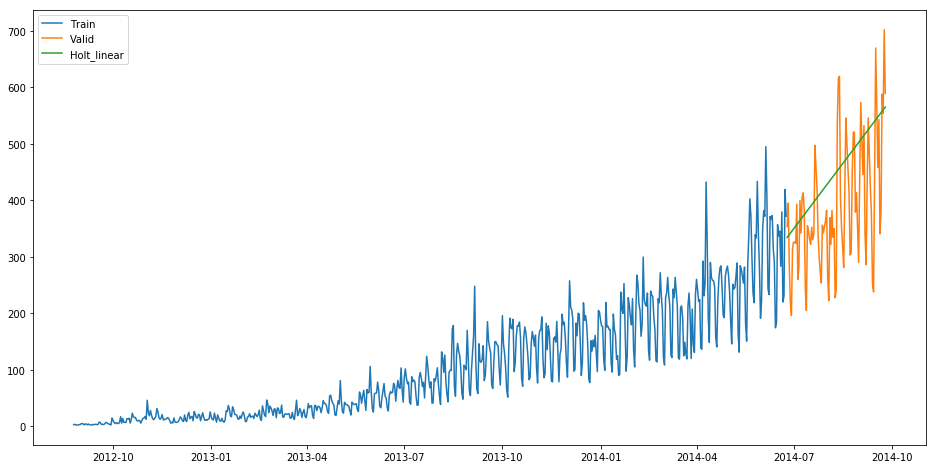

In [45]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [46]:
y_hat_avg['Holt_linear']

Datetime
2014-06-25    334.650767
2014-06-26    337.159011
2014-06-27    339.667256
2014-06-28    342.175500
2014-06-29    344.683745
2014-06-30    347.191989
2014-07-01    349.700233
2014-07-02    352.208478
2014-07-03    354.716722
2014-07-04    357.224967
2014-07-05    359.733211
2014-07-06    362.241455
2014-07-07    364.749700
2014-07-08    367.257944
2014-07-09    369.766189
2014-07-10    372.274433
2014-07-11    374.782677
2014-07-12    377.290922
2014-07-13    379.799166
2014-07-14    382.307411
2014-07-15    384.815655
2014-07-16    387.323900
2014-07-17    389.832144
2014-07-18    392.340388
2014-07-19    394.848633
2014-07-20    397.356877
2014-07-21    399.865122
2014-07-22    402.373366
2014-07-23    404.881610
2014-07-24    407.389855
                 ...    
2014-08-27    492.670165
2014-08-28    495.178409
2014-08-29    497.686654
2014-08-30    500.194898
2014-08-31    502.703143
2014-09-01    505.211387
2014-09-02    507.719631
2014-09-03    510.227876
2014-09-04    51

In [47]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

112.94278345314041


In [48]:
submission=pd.read_csv("sample_submission_LSeus50.csv")

In [49]:
predict=fit1.forecast(len(test))

In [50]:
test['prediction']=predict

In [51]:
test

,ID,year,month,day,Hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745
2014-10-01,18419.5,2014.0,10.0,1.0,11.5,347.191989
2014-10-02,18443.5,2014.0,10.0,2.0,11.5,349.700233
2014-10-03,18467.5,2014.0,10.0,3.0,11.5,352.208478
2014-10-04,18491.5,2014.0,10.0,4.0,11.5,354.716722


In [52]:
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

In [53]:
train_original

,ID,Datetime,Count,year,month,day,Hour,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,7.870093e-07
5,5,2012-08-25 05:00:00,2,2012,8,25,5,7.870093e-07
6,6,2012-08-25 06:00:00,2,2012,8,25,6,7.870093e-07
7,7,2012-08-25 07:00:00,2,2012,8,25,7,7.870093e-07
8,8,2012-08-25 08:00:00,6,2012,8,25,8,2.361028e-06
9,9,2012-08-25 09:00:00,2,2012,8,25,9,7.870093e-07


In [54]:
temp=train_original.groupby(['Hour'])['ratio'].sum() 

In [55]:
temp

Hour
0     0.044287
1     0.035343
2     0.029911
3     0.024714
4     0.020802
5     0.018621
6     0.020023
7     0.023221
8     0.026741
9     0.034555
10    0.049047
11    0.054375
12    0.054951
13    0.048600
14    0.051965
15    0.051309
16    0.049999
17    0.051164
18    0.052423
19    0.055627
20    0.053455
21    0.049895
22    0.050076
23    0.048892
Name: ratio, dtype: float64

In [56]:
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 

In [57]:
temp2=pd.read_csv("GROUPby.csv") 
temp2=temp2.drop('Hour.1',1) 

In [58]:
temp2

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802
5,5,0.018621
6,6,0.020023
7,7,0.023221
8,8,0.026741
9,9,0.034555


In [59]:
test

,ID,year,month,day,Hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745
2014-10-01,18419.5,2014.0,10.0,1.0,11.5,347.191989
2014-10-02,18443.5,2014.0,10.0,2.0,11.5,349.700233
2014-10-03,18467.5,2014.0,10.0,3.0,11.5,352.208478
2014-10-04,18491.5,2014.0,10.0,4.0,11.5,354.716722


In [60]:
test_original

,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4
5,18293,2014-09-26 05:00:00,2014,9,26,5
6,18294,2014-09-26 06:00:00,2014,9,26,6
7,18295,2014-09-26 07:00:00,2014,9,26,7
8,18296,2014-09-26 08:00:00,2014,9,26,8
9,18297,2014-09-26 09:00:00,2014,9,26,9


In [61]:
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 

In [62]:
merge

,ID_x,year,month,day,Hour_x,prediction,ID_y,Datetime,Hour_y
0,18299.5,2014.0,9.0,26.0,11.5,334.650767,18288,2014-09-26 00:00:00,0
1,18299.5,2014.0,9.0,26.0,11.5,334.650767,18289,2014-09-26 01:00:00,1
2,18299.5,2014.0,9.0,26.0,11.5,334.650767,18290,2014-09-26 02:00:00,2
3,18299.5,2014.0,9.0,26.0,11.5,334.650767,18291,2014-09-26 03:00:00,3
4,18299.5,2014.0,9.0,26.0,11.5,334.650767,18292,2014-09-26 04:00:00,4
5,18299.5,2014.0,9.0,26.0,11.5,334.650767,18293,2014-09-26 05:00:00,5
6,18299.5,2014.0,9.0,26.0,11.5,334.650767,18294,2014-09-26 06:00:00,6
7,18299.5,2014.0,9.0,26.0,11.5,334.650767,18295,2014-09-26 07:00:00,7
8,18299.5,2014.0,9.0,26.0,11.5,334.650767,18296,2014-09-26 08:00:00,8
9,18299.5,2014.0,9.0,26.0,11.5,334.650767,18297,2014-09-26 09:00:00,9


In [63]:
merge['Hour']=merge['Hour_y'] 
merge

,ID_x,year,month,day,Hour_x,prediction,ID_y,Datetime,Hour_y,Hour
0,18299.5,2014.0,9.0,26.0,11.5,334.650767,18288,2014-09-26 00:00:00,0,0
1,18299.5,2014.0,9.0,26.0,11.5,334.650767,18289,2014-09-26 01:00:00,1,1
2,18299.5,2014.0,9.0,26.0,11.5,334.650767,18290,2014-09-26 02:00:00,2,2
3,18299.5,2014.0,9.0,26.0,11.5,334.650767,18291,2014-09-26 03:00:00,3,3
4,18299.5,2014.0,9.0,26.0,11.5,334.650767,18292,2014-09-26 04:00:00,4,4
5,18299.5,2014.0,9.0,26.0,11.5,334.650767,18293,2014-09-26 05:00:00,5,5
6,18299.5,2014.0,9.0,26.0,11.5,334.650767,18294,2014-09-26 06:00:00,6,6
7,18299.5,2014.0,9.0,26.0,11.5,334.650767,18295,2014-09-26 07:00:00,7,7
8,18299.5,2014.0,9.0,26.0,11.5,334.650767,18296,2014-09-26 08:00:00,8,8
9,18299.5,2014.0,9.0,26.0,11.5,334.650767,18297,2014-09-26 09:00:00,9,9


In [64]:
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

In [65]:
temp2

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802
5,5,0.018621
6,6,0.020023
7,7,0.023221
8,8,0.026741
9,9,0.034555


In [66]:
prediction=pd.merge(merge, temp2, on='Hour', how='left') 
prediction

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802
5,18299.5,26.0,334.650767,18293,5,0.018621
6,18299.5,26.0,334.650767,18294,6,0.020023
7,18299.5,26.0,334.650767,18295,7,0.023221
8,18299.5,26.0,334.650767,18296,8,0.026741
9,18299.5,26.0,334.650767,18297,9,0.034555


In [67]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [68]:
prediction

,ID_x,day,prediction,ID_y,Hour,ratio,Count,ID
0,18299.5,26.0,334.650767,18288,0,0.044287,355.692974,18288
1,18299.5,26.0,334.650767,18289,1,0.035343,283.861602,18289
2,18299.5,26.0,334.650767,18290,2,0.029911,240.234347,18290
3,18299.5,26.0,334.650767,18291,3,0.024714,198.497058,18291
4,18299.5,26.0,334.650767,18292,4,0.020802,167.075574,18292
5,18299.5,26.0,334.650767,18293,5,0.018621,149.560198,18293
6,18299.5,26.0,334.650767,18294,6,0.020023,160.817825,18294
7,18299.5,26.0,334.650767,18295,7,0.023221,186.506200,18295
8,18299.5,26.0,334.650767,18296,8,0.026741,214.773526,18296
9,18299.5,26.0,334.650767,18297,9,0.034555,277.534323,18297


In [69]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1) 
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('submission.csv')

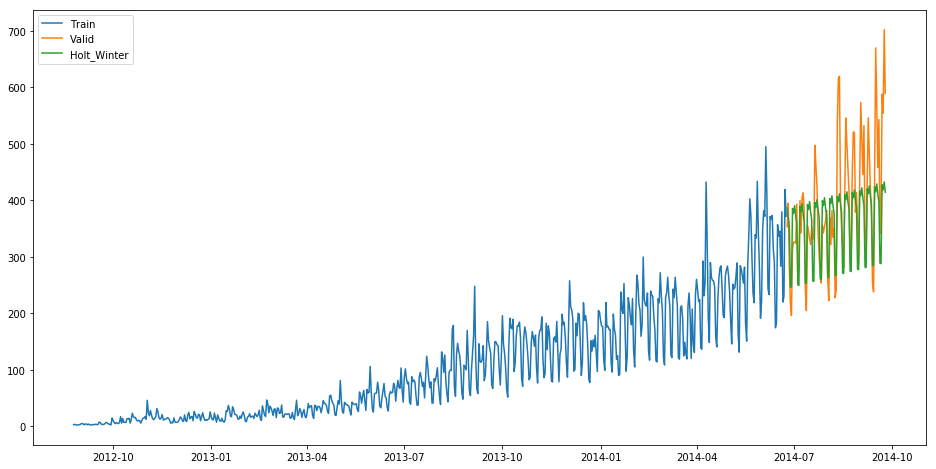

In [70]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [71]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 
print(rms)


82.37601031522233


In [72]:
predict=fit1.forecast(len(test))
test['prediction']=predict
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# ProcessLookupErroredicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 
# Converting the ratio to the original scale prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [73]:
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

In [74]:
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Submission2.csv')

In [27]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model_arima = ARIMA(Train['Count'],order=(1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

In [144]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train_log_diff.dropna(),order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 638.9021866251045
(0, 0, 1) 523.5753728209461
(0, 0, 2) 393.22493357791836
(0, 0, 3) 395.08612357916104
(0, 1, 0) 1181.2235915428726
(0, 1, 1) 647.4257353046949
(0, 2, 0) 1861.1558811129032
(0, 2, 1) 1188.9608263455648
(1, 0, 0) 629.9646272918574
(1, 0, 1) 440.3803271284403
(1, 0, 2) 395.14281795961006
(1, 0, 3) 390.3791834982021
(1, 0, 4) 375.1560379622217
(1, 1, 0) 1072.239509400422
(1, 1, 4) 405.3863393242591
(1, 2, 0) 1631.7113513605439
(2, 0, 0) 518.9738623438393
(2, 0, 1) 386.9984770052247
(2, 0, 2) 387.2103097787269
(2, 0, 3) 359.33818741169193
(2, 1, 0) 880.0359944692073
(2, 1, 2) 396.4865997154209
(2, 2, 0) 1373.3999612251707
(3, 0, 0) 507.29480548695733
(3, 0, 1) 388.54480553373014
(3, 0, 2) 388.9984751269385
(3, 0, 3) 277.1389894927679
(3, 1, 0) 801.9629696526229
(3, 1, 1) 517.0555508365712
(3, 2, 0) 1135.9064257789214
(4, 0, 0) 491.638578412231
(4, 0, 1) 365.83331245078216
(4, 0, 2) 254.78210273453715
(4, 0, 3) 275.5336078395401
(4, 0, 4) 214.3336020734116
(4, 1, 

In [149]:
model_arima = ARIMA(train_log_diff.dropna(),order=(4, 0, 4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

214.3336020734116


In [150]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([-0.1706751 ,  0.09277474, -0.01582433, -0.27340282,  0.05482687,
        0.33346975, -0.01250042, -0.16537062,  0.11802235,  0.01734679])

In [ ]:
plt.plot(train_log_diff.dropna())
plt.plot(predictions,color='red')

In [81]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean()  
    rolstd = timeseries.rolling(24).std()
    #rolmean = pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    #rolstd = pd.rolling_std(timeseries, window=24)
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10

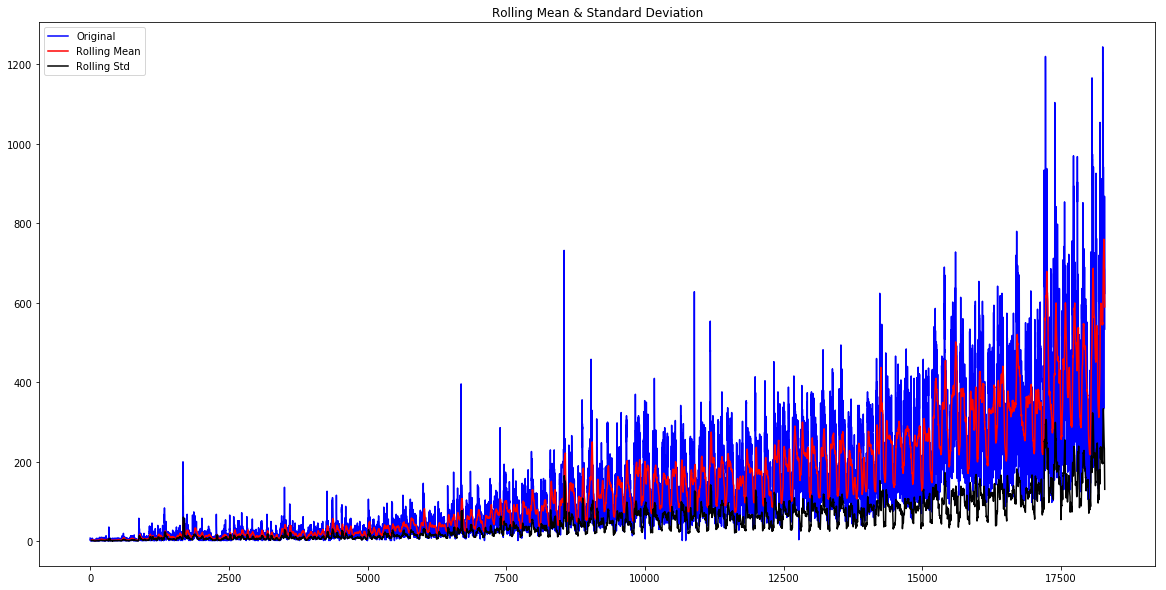

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [82]:
test_stationarity(train_original['Count'])


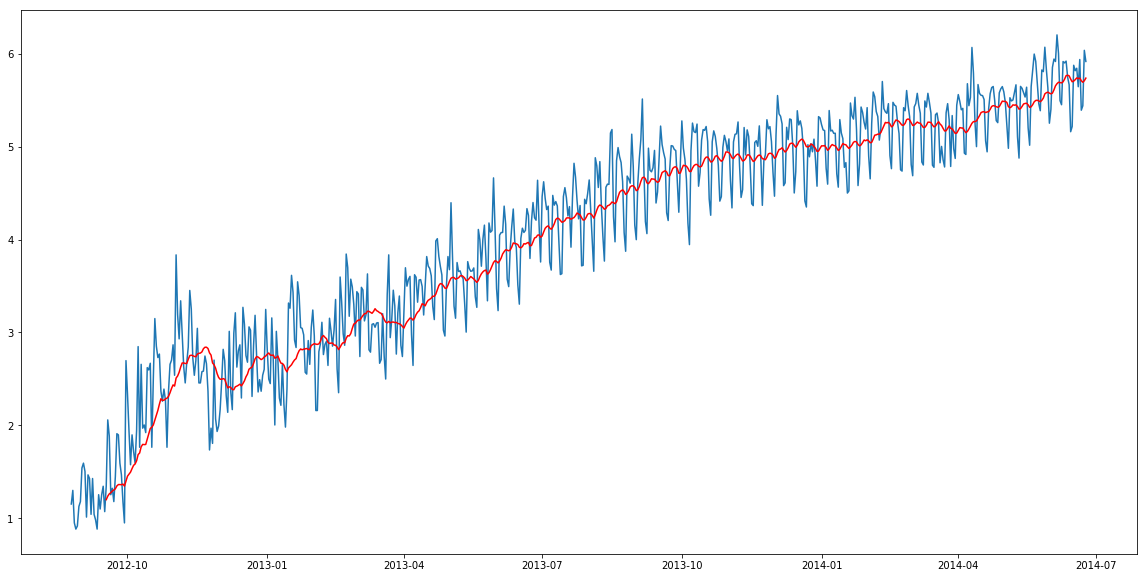

In [84]:
Train_log = np.log(Train['Count']) 
valid_log = np.log(valid['Count'])
moving_avg = Train_log.rolling(24).mean() 
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [85]:
train_log_moving_avg_diff = Train_log - moving_avg

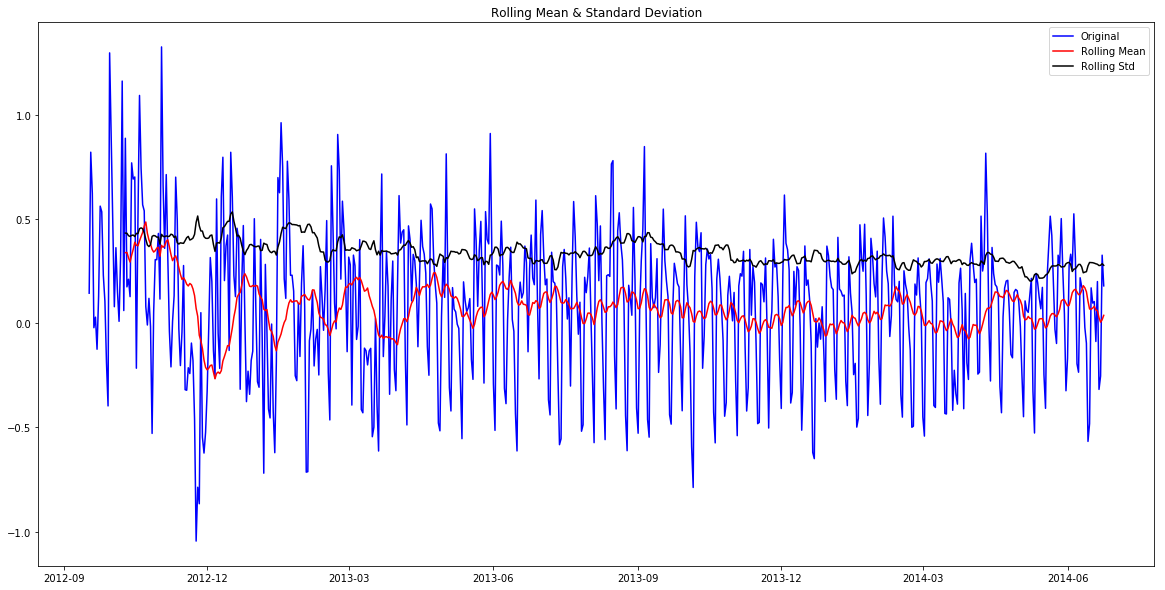

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [86]:
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

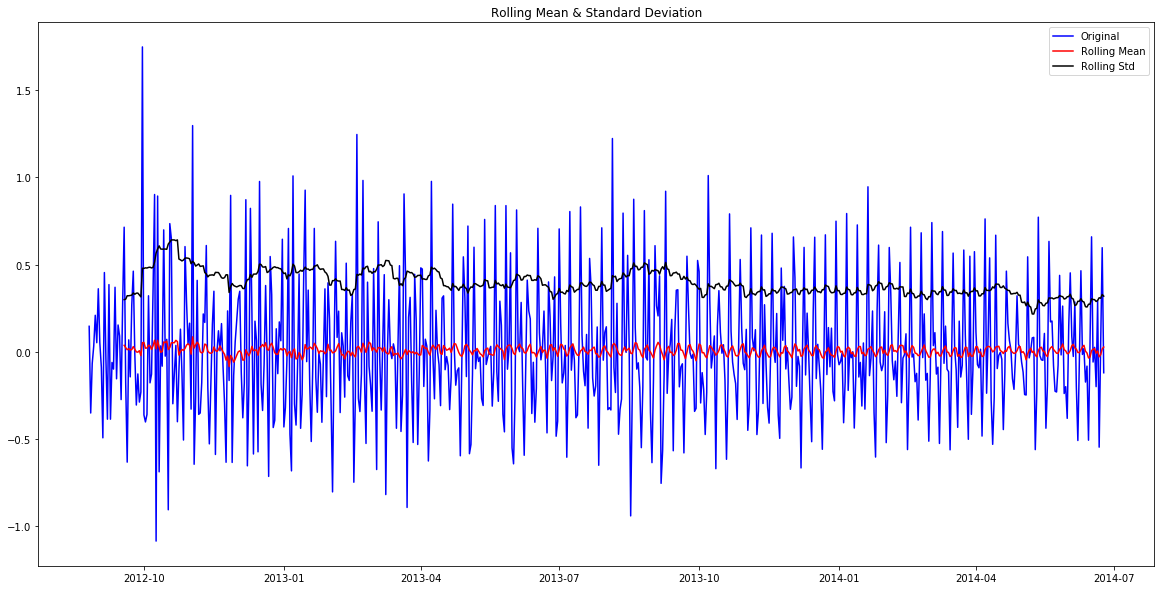

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [87]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

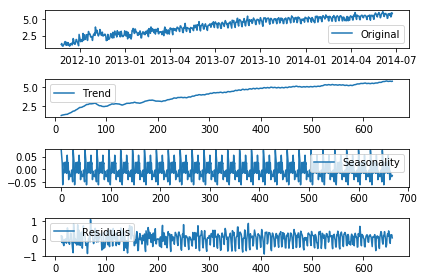

In [270]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()


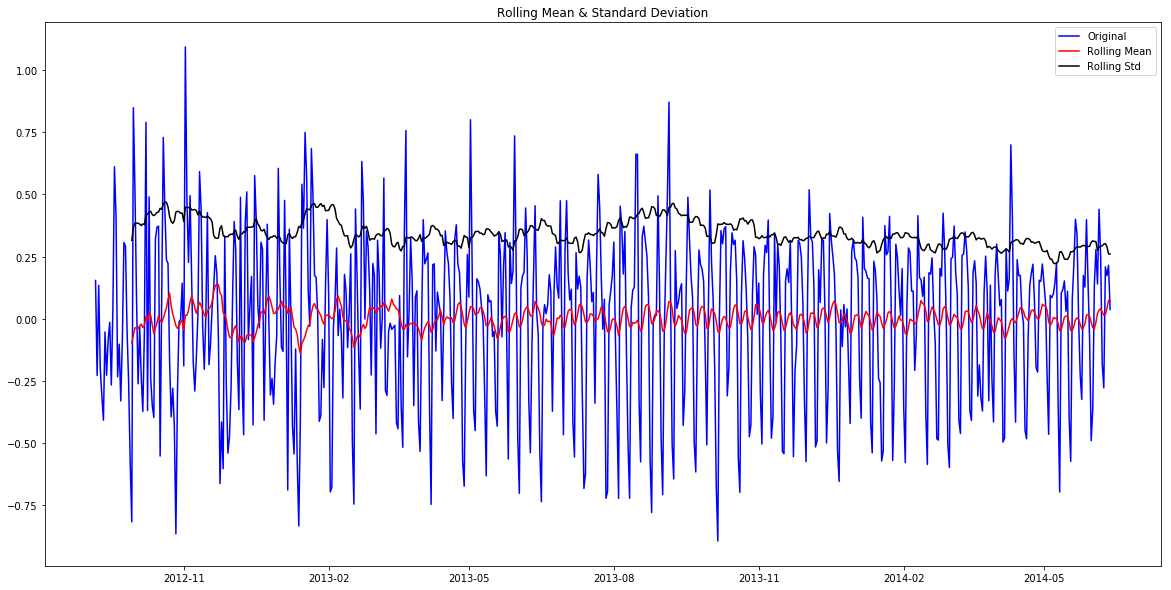

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [90]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

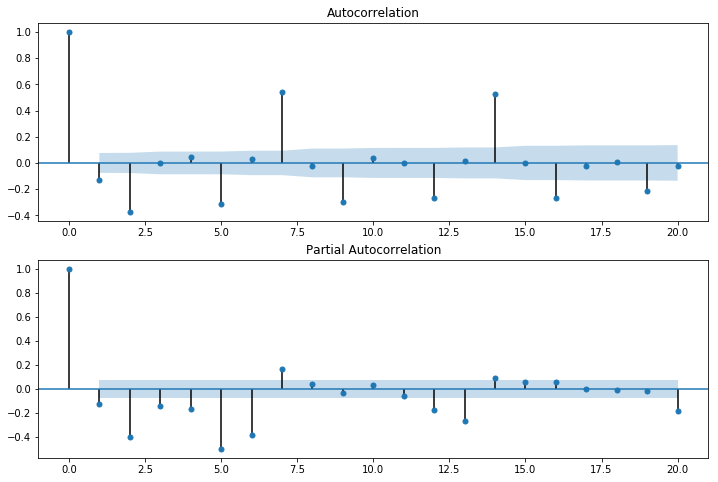

In [137]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_log_diff.dropna(), lags=20, ax=ax1)  
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_log_diff.dropna(), lags=20, ax=ax2)

In [152]:
arima_mod6 = sm.tsa.ARIMA(train_log_diff.dropna(), (4,0,4)).fit(disp=False)
print(arima_mod6.summary())

                              ARMA Model Results                              
Dep. Variable:                  Count   No. Observations:                  668
Model:                     ARMA(4, 4)   Log Likelihood                 -97.167
Method:                       css-mle   S.D. of innovations              0.279
Date:                Tue, 28 Apr 2020   AIC                            214.334
Time:                        12:07:31   BIC                            259.376
Sample:                    08-26-2012   HQIC                           231.783
                         - 06-24-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0070      0.007      0.996      0.320      -0.007       0.021
ar.L1.Count     0.7570      0.025     30.824      0.000       0.709       0.805
ar.L2.Count    -1.3762      0.023    -60.666    

In [156]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(train_log_diff.dropna(), trend='n', order=(4,0,4)).fit()
print(sarima_mod6.summary())

                           Statespace Model Results                           
Dep. Variable:                  Count   No. Observations:                  668
Model:               SARIMAX(4, 0, 4)   Log Likelihood                 -97.792
Date:                Tue, 28 Apr 2020   AIC                            213.584
Time:                        12:15:35   BIC                            254.122
Sample:                    08-26-2012   HQIC                           229.288
                         - 06-24-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7519      0.025     30.433      0.000       0.703       0.800
ar.L2         -1.3716      0.021    -66.555      0.000      -1.412      -1.331
ar.L3          0.7905      0.021     37.805      0.0

In [263]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
   # print(predict)
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    rms = sqrt(mean_squared_error(given_set.Count,predict)) 
    print(rms)
    
    plt.show()
    return predict

103.96349857370865


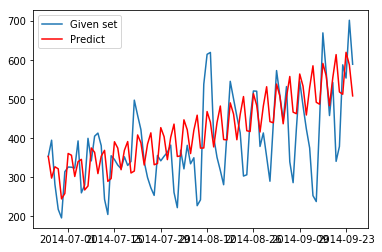

Datetime
2014-06-25    353.666667
2014-06-26    298.174757
2014-06-27    327.161682
2014-06-28    322.025314
2014-06-29    244.992436
2014-06-30    258.799648
2014-07-01    361.233281
2014-07-02    356.745819
2014-07-03    302.370448
2014-07-04    340.248169
2014-07-05    346.201873
2014-07-06    267.895093
2014-07-07    278.039819
2014-07-08    375.347485
2014-07-09    364.222670
2014-07-10    309.731388
2014-07-11    354.267255
2014-07-12    369.269513
2014-07-13    289.870862
2014-07-14    297.123439
2014-07-15    391.255385
2014-07-16    375.053506
2014-07-17    319.636765
2014-07-18    369.297351
2014-07-19    391.734028
2014-07-20    311.267310
2014-07-21    316.227582
2014-07-22    408.672211
2014-07-23    388.552921
2014-07-24    331.664439
                 ...    
2014-08-27    484.417133
2014-08-28    416.180537
2014-08-29    482.686364
2014-08-30    532.116296
2014-08-31    442.738782
2014-09-01    439.824342
2014-09-02    538.853189
2014-09-03    508.217168
2014-09-04    43

In [264]:
ARIMA_predict_diff=arima_mod6.predict(start="2014-06-25", end="2014-09-25")
pre = check_prediction_diff(ARIMA_predict_diff, valid)
pre

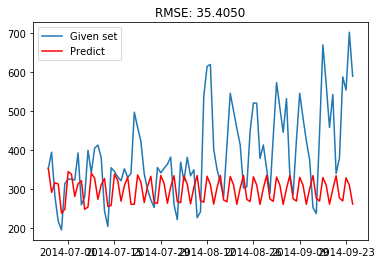

In [175]:
SARIMA_predict_diff=sarima_mod6.predict(start="2014-06-25", end="2014-09-25")
pre2 = check_prediction_diff(SARIMA_predict_diff, valid)

In [42]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

In [43]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        #try:
            mod = sm.tsa.statespace.SARIMAX(Train.Count,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
       # except:
        #    continue

SARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:8522.252834733663
SARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:7818.571491736308
SARIMA(0, 0, 0)x(0, 0, 2, 7) - AIC:7318.368829451293
SARIMA(0, 0, 0)x(0, 0, 3, 7) - AIC:7008.310815542603
SARIMA(0, 0, 0)x(0, 0, 4, 7) - AIC:6807.567846523589
SARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:6444.19317564952
SARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:6230.1227606886005
SARIMA(0, 0, 0)x(0, 1, 2, 7) - AIC:6172.419964294266
SARIMA(0, 0, 0)x(0, 1, 3, 7) - AIC:6114.233773962835
SARIMA(0, 0, 0)x(0, 1, 4, 7) - AIC:6033.220066455991
SARIMA(0, 0, 0)x(0, 2, 0, 7) - AIC:7051.528928212027
SARIMA(0, 0, 0)x(0, 2, 1, 7) - AIC:6342.380527991123
SARIMA(0, 0, 0)x(0, 2, 2, 7) - AIC:6070.042748072719
SARIMA(0, 0, 0)x(0, 2, 3, 7) - AIC:6007.517915231613
SARIMA(0, 0, 0)x(0, 2, 4, 7) - AIC:5944.316755992774
SARIMA(0, 0, 0)x(0, 3, 0, 7) - AIC:7620.814154909881
SARIMA(0, 0, 0)x(0, 3, 1, 7) - AIC:6843.778988345656
SARIMA(0, 0, 0)x(0, 3, 2, 7) - AIC:6401.254765307141


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(0, 3, 3, 7) - AIC:6401.984912553131


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(0, 3, 4, 7) - AIC:6171.143727889368
SARIMA(0, 0, 0)x(0, 4, 0, 7) - AIC:7461.213859986595
SARIMA(0, 0, 0)x(0, 4, 1, 7) - AIC:6756.3949301587145
SARIMA(0, 0, 0)x(0, 4, 2, 7) - AIC:6363.394115202682


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(0, 4, 3, 7) - AIC:6304.364756396855


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(0, 4, 4, 7) - AIC:6225.766906392971
SARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:6454.748850277487
SARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:6199.70469418806
SARIMA(0, 0, 0)x(1, 0, 2, 7) - AIC:6137.347416345883
SARIMA(0, 0, 0)x(1, 0, 3, 7) - AIC:6078.419379308149
SARIMA(0, 0, 0)x(1, 0, 4, 7) - AIC:6006.999250059662
SARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:6272.912132562643
SARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:6232.1214026726575
SARIMA(0, 0, 0)x(1, 1, 2, 7) - AIC:6170.312339124221
SARIMA(0, 0, 0)x(1, 1, 3, 7) - AIC:6105.154618867617


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(1, 1, 4, 7) - AIC:6010.1936527238195
SARIMA(0, 0, 0)x(1, 2, 0, 7) - AIC:6606.670804866537
SARIMA(0, 0, 0)x(1, 2, 1, 7) - AIC:6219.03765050112
SARIMA(0, 0, 0)x(1, 2, 2, 7) - AIC:6071.153482464894
SARIMA(0, 0, 0)x(1, 2, 3, 7) - AIC:6010.362021457446
SARIMA(0, 0, 0)x(1, 2, 4, 7) - AIC:5931.252787395945
SARIMA(0, 0, 0)x(1, 3, 0, 7) - AIC:6751.198938365096
SARIMA(0, 0, 0)x(1, 3, 1, 7) - AIC:6546.731445207435
SARIMA(0, 0, 0)x(1, 3, 2, 7) - AIC:6428.563337121406
SARIMA(0, 0, 0)x(1, 3, 3, 7) - AIC:6366.631553868541


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(1, 3, 4, 7) - AIC:6113.331412729115
SARIMA(0, 0, 0)x(1, 4, 0, 7) - AIC:6908.922799472159
SARIMA(0, 0, 0)x(1, 4, 1, 7) - AIC:6599.272975986891
SARIMA(0, 0, 0)x(1, 4, 2, 7) - AIC:6530.380352422881


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(1, 4, 3, 7) - AIC:6283.248672930153


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(1, 4, 4, 7) - AIC:6178.971478082282
SARIMA(0, 0, 0)x(2, 0, 0, 7) - AIC:6265.188167910666
SARIMA(0, 0, 0)x(2, 0, 1, 7) - AIC:6146.55542461572
SARIMA(0, 0, 0)x(2, 0, 2, 7) - AIC:6139.196679899382


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(2, 0, 3, 7) - AIC:6067.907509697526


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(2, 0, 4, 7) - AIC:6009.204047348803
SARIMA(0, 0, 0)x(2, 1, 0, 7) - AIC:6202.788821177808
SARIMA(0, 0, 0)x(2, 1, 1, 7) - AIC:6182.943291617734
SARIMA(0, 0, 0)x(2, 1, 2, 7) - AIC:6168.293006448024
SARIMA(0, 0, 0)x(2, 1, 3, 7) - AIC:6106.287160704736
SARIMA(0, 0, 0)x(2, 1, 4, 7) - AIC:5998.289531458132
SARIMA(0, 0, 0)x(2, 2, 0, 7) - AIC:6463.073446893506
SARIMA(0, 0, 0)x(2, 2, 1, 7) - AIC:6149.653399444049
SARIMA(0, 0, 0)x(2, 2, 2, 7) - AIC:6071.3978742468025
SARIMA(0, 0, 0)x(2, 2, 3, 7) - AIC:6003.432341841876
SARIMA(0, 0, 0)x(2, 2, 4, 7) - AIC:5930.807695932519
SARIMA(0, 0, 0)x(2, 3, 0, 7) - AIC:6680.517338553324
SARIMA(0, 0, 0)x(2, 3, 1, 7) - AIC:6472.701673985666
SARIMA(0, 0, 0)x(2, 3, 2, 7) - AIC:6378.999831313974
SARIMA(0, 0, 0)x(2, 3, 3, 7) - AIC:6362.9362212519045


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(2, 3, 4, 7) - AIC:6136.184873184271
SARIMA(0, 0, 0)x(2, 4, 0, 7) - AIC:6800.1677082515325
SARIMA(0, 0, 0)x(2, 4, 1, 7) - AIC:6542.802933339075
SARIMA(0, 0, 0)x(2, 4, 2, 7) - AIC:6516.796418888429


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(2, 4, 3, 7) - AIC:6256.2627330813175
SARIMA(0, 0, 0)x(2, 4, 4, 7) - AIC:6167.419565308785
SARIMA(0, 0, 0)x(3, 0, 0, 7) - AIC:6184.868453033557
SARIMA(0, 0, 0)x(3, 0, 1, 7) - AIC:6089.843554683475


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(3, 0, 2, 7) - AIC:6081.364533333266


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(3, 0, 3, 7) - AIC:6071.77847230569


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(3, 0, 4, 7) - AIC:6015.061323897554
SARIMA(0, 0, 0)x(3, 1, 0, 7) - AIC:6106.063606845582
SARIMA(0, 0, 0)x(3, 1, 1, 7) - AIC:6106.52510040764
SARIMA(0, 0, 0)x(3, 1, 2, 7) - AIC:6108.468326581545
SARIMA(0, 0, 0)x(3, 1, 3, 7) - AIC:6071.373371097932


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(3, 1, 4, 7) - AIC:5985.781727599453
SARIMA(0, 0, 0)x(3, 2, 0, 7) - AIC:6286.802786546836
SARIMA(0, 0, 0)x(3, 2, 1, 7) - AIC:6031.784695634961
SARIMA(0, 0, 0)x(3, 2, 2, 7) - AIC:6011.690897089356


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(3, 2, 3, 7) - AIC:5998.315304553467


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(3, 2, 4, 7) - AIC:5932.664452070913
SARIMA(0, 0, 0)x(3, 3, 0, 7) - AIC:6575.705406475718
SARIMA(0, 0, 0)x(3, 3, 1, 7) - AIC:6308.900701137843
SARIMA(0, 0, 0)x(3, 3, 2, 7) - AIC:6067.129721051289


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(3, 3, 3, 7) - AIC:6261.114013504321


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(3, 3, 4, 7) - AIC:6199.6473319547185
SARIMA(0, 0, 0)x(3, 4, 0, 7) - AIC:6657.9986958295085
SARIMA(0, 0, 0)x(3, 4, 1, 7) - AIC:6407.598913474549
SARIMA(0, 0, 0)x(3, 4, 2, 7) - AIC:6200.842207348857


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(3, 4, 3, 7) - AIC:6181.249083192693


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(3, 4, 4, 7) - AIC:6186.918854402493
SARIMA(0, 0, 0)x(4, 0, 0, 7) - AIC:6056.7708622250375
SARIMA(0, 0, 0)x(4, 0, 1, 7) - AIC:6011.153484425496
SARIMA(0, 0, 0)x(4, 0, 2, 7) - AIC:6011.590554782764


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 0, 3, 7) - AIC:6013.2596249511025


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 0, 4, 7) - AIC:6002.872413763294
SARIMA(0, 0, 0)x(4, 1, 0, 7) - AIC:6046.67899779879
SARIMA(0, 0, 0)x(4, 1, 1, 7) - AIC:6048.609734317641
SARIMA(0, 0, 0)x(4, 1, 2, 7) - AIC:6050.321530117501


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 1, 3, 7) - AIC:5999.134440714662


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 1, 4, 7) - AIC:5982.0308651682935
SARIMA(0, 0, 0)x(4, 2, 0, 7) - AIC:6162.694512970025
SARIMA(0, 0, 0)x(4, 2, 1, 7) - AIC:5957.546791786082
SARIMA(0, 0, 0)x(4, 2, 2, 7) - AIC:5944.874473646976


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 2, 3, 7) - AIC:5945.114195206488


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 2, 4, 7) - AIC:5934.250018167499
SARIMA(0, 0, 0)x(4, 3, 0, 7) - AIC:6456.917226506379
SARIMA(0, 0, 0)x(4, 3, 1, 7) - AIC:6177.750454315386


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 3, 2, 7) - AIC:5986.784877733424


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 3, 3, 7) - AIC:6200.633702299387


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 3, 4, 7) - AIC:6094.909563296671
SARIMA(0, 0, 0)x(4, 4, 0, 7) - AIC:6549.038921111272
SARIMA(0, 0, 0)x(4, 4, 1, 7) - AIC:6304.337271797263


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 4, 2, 7) - AIC:6187.384528234313


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 4, 3, 7) - AIC:6124.503396311742


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(4, 4, 4, 7) - AIC:6186.724622237542
SARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:7795.445294211662
SARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:7301.478112399769
SARIMA(0, 0, 1)x(0, 0, 2, 7) - AIC:6928.161199066033
SARIMA(0, 0, 1)x(0, 0, 3, 7) - AIC:6704.410464164033
SARIMA(0, 0, 1)x(0, 0, 4, 7) - AIC:6514.174583552978
SARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:6306.091700956411
SARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:6059.93013746419
SARIMA(0, 0, 1)x(0, 1, 2, 7) - AIC:6003.861383667558
SARIMA(0, 0, 1)x(0, 1, 3, 7) - AIC:5947.021624592382
SARIMA(0, 0, 1)x(0, 1, 4, 7) - AIC:5874.561283423294
SARIMA(0, 0, 1)x(0, 2, 0, 7) - AIC:6916.039581434489
SARIMA(0, 0, 1)x(0, 2, 1, 7) - AIC:6209.291855048659
SARIMA(0, 0, 1)x(0, 2, 2, 7) - AIC:5914.331941354951
SARIMA(0, 0, 1)x(0, 2, 3, 7) - AIC:5854.70518790896
SARIMA(0, 0, 1)x(0, 2, 4, 7) - AIC:5798.844919725203
SARIMA(0, 0, 1)x(0, 3, 0, 7) - AIC:7459.464104482078
SARIMA(0, 0, 1)x(0, 3, 1, 7) - AIC:6681.039351544383
SARIMA(0, 0, 1)x(0, 3, 2, 7) - AIC:6227.01164052

C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(0, 3, 4, 7) - AIC:6155.52552776697


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(0, 4, 0, 7) - AIC:7457.420442442188
SARIMA(0, 0, 1)x(0, 4, 1, 7) - AIC:6613.570608544395
SARIMA(0, 0, 1)x(0, 4, 2, 7) - AIC:6207.744852051914


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(0, 4, 3, 7) - AIC:6150.149098400323


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(0, 4, 4, 7) - AIC:6076.497490055018
SARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:6324.574186685848
SARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:6040.989665869778
SARIMA(0, 0, 1)x(1, 0, 2, 7) - AIC:5981.249322033929


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(1, 0, 3, 7) - AIC:5927.778587692183


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(1, 0, 4, 7) - AIC:5864.313330733206
SARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:6141.658563408411
SARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:6061.913433645878
SARIMA(0, 0, 1)x(1, 1, 2, 7) - AIC:6005.548329456675
SARIMA(0, 0, 1)x(1, 1, 3, 7) - AIC:5946.246561365415
SARIMA(0, 0, 1)x(1, 1, 4, 7) - AIC:5877.1806910703435
SARIMA(0, 0, 1)x(1, 2, 0, 7) - AIC:6503.373758727996
SARIMA(0, 0, 1)x(1, 2, 1, 7) - AIC:6086.706001691013
SARIMA(0, 0, 1)x(1, 2, 2, 7) - AIC:5915.827529177264


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(1, 2, 3, 7) - AIC:5855.973438832556
SARIMA(0, 0, 1)x(1, 2, 4, 7) - AIC:5789.7622686151235
SARIMA(0, 0, 1)x(1, 3, 0, 7) - AIC:6623.963006237384
SARIMA(0, 0, 1)x(1, 3, 1, 7) - AIC:6375.562032690041
SARIMA(0, 0, 1)x(1, 3, 2, 7) - AIC:6278.658307607302


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(1, 3, 3, 7) - AIC:6109.39063104067


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(1, 3, 4, 7) - AIC:6853.134147724259
SARIMA(0, 0, 1)x(1, 4, 0, 7) - AIC:6796.769265152363
SARIMA(0, 0, 1)x(1, 4, 1, 7) - AIC:6454.739862037903
SARIMA(0, 0, 1)x(1, 4, 2, 7) - AIC:6208.006642278841


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(1, 4, 3, 7) - AIC:6131.828214718727


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(1, 4, 4, 7) - AIC:6048.678760679491
SARIMA(0, 0, 1)x(2, 0, 0, 7) - AIC:6140.878993031357


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(2, 0, 1, 7) - AIC:5998.690915263668
SARIMA(0, 0, 1)x(2, 0, 2, 7) - AIC:5982.365471504184


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(2, 0, 3, 7) - AIC:5921.1943115962495


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(2, 0, 4, 7) - AIC:5861.250145408951
SARIMA(0, 0, 1)x(2, 1, 0, 7) - AIC:6055.618963294795
SARIMA(0, 0, 1)x(2, 1, 1, 7) - AIC:6022.300604221773
SARIMA(0, 0, 1)x(2, 1, 2, 7) - AIC:6006.559005764128
SARIMA(0, 0, 1)x(2, 1, 3, 7) - AIC:5942.623792184574


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(2, 1, 4, 7) - AIC:5852.130082923457
SARIMA(0, 0, 1)x(2, 2, 0, 7) - AIC:6341.502941432058
SARIMA(0, 0, 1)x(2, 2, 1, 7) - AIC:6011.967010664659
SARIMA(0, 0, 1)x(2, 2, 2, 7) - AIC:5916.321800982707


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(2, 2, 3, 7) - AIC:6027.088280980393


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(2, 2, 4, 7) - AIC:5781.381426992324
SARIMA(0, 0, 1)x(2, 3, 0, 7) - AIC:6546.966328992591
SARIMA(0, 0, 1)x(2, 3, 1, 7) - AIC:6322.104269426448
SARIMA(0, 0, 1)x(2, 3, 2, 7) - AIC:6279.112148893048


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(2, 3, 3, 7) - AIC:6067.044585459061


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(2, 3, 4, 7) - AIC:5968.170876636748
SARIMA(0, 0, 1)x(2, 4, 0, 7) - AIC:6675.619121079781
SARIMA(0, 0, 1)x(2, 4, 1, 7) - AIC:6405.3977977397535
SARIMA(0, 0, 1)x(2, 4, 2, 7) - AIC:6199.98541565257


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(2, 4, 3, 7) - AIC:6116.031878055123


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(2, 4, 4, 7) - AIC:6041.407791178493
SARIMA(0, 0, 1)x(3, 0, 0, 7) - AIC:6046.947964509625


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 0, 1, 7) - AIC:5943.883600781908


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 0, 2, 7) - AIC:5942.761085354428


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 0, 3, 7) - AIC:5920.183223810236


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 0, 4, 7) - AIC:5872.451587047151
SARIMA(0, 0, 1)x(3, 1, 0, 7) - AIC:5955.064794758293
SARIMA(0, 0, 1)x(3, 1, 1, 7) - AIC:5952.881830243701
SARIMA(0, 0, 1)x(3, 1, 2, 7) - AIC:5954.4304153751145
SARIMA(0, 0, 1)x(3, 1, 3, 7) - AIC:5936.24887750426


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 1, 4, 7) - AIC:5840.1830737035925
SARIMA(0, 0, 1)x(3, 2, 0, 7) - AIC:6154.834166744654
SARIMA(0, 0, 1)x(3, 2, 1, 7) - AIC:5896.4507598948985
SARIMA(0, 0, 1)x(3, 2, 2, 7) - AIC:5876.070097600048


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 2, 3, 7) - AIC:5853.828179403682


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 2, 4, 7) - AIC:5792.400232576672
SARIMA(0, 0, 1)x(3, 3, 0, 7) - AIC:6438.304002427285
SARIMA(0, 0, 1)x(3, 3, 1, 7) - AIC:6177.495330241298


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 3, 2, 7) - AIC:6174.4195369321815


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 3, 3, 7) - AIC:6729.712319175935


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 3, 4, 7) - AIC:nan
SARIMA(0, 0, 1)x(3, 4, 0, 7) - AIC:6525.82473155128
SARIMA(0, 0, 1)x(3, 4, 1, 7) - AIC:6278.364412473633


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 4, 2, 7) - AIC:6086.295726519678


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 4, 3, 7) - AIC:6071.199925429983


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(3, 4, 4, 7) - AIC:6038.335080695507
SARIMA(0, 0, 1)x(4, 0, 0, 7) - AIC:5924.271883950347


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 0, 1, 7) - AIC:6145.326303666279


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 0, 2, 7) - AIC:5877.7221159823985


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 0, 3, 7) - AIC:5938.245015274393


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 0, 4, 7) - AIC:5989.340640183603
SARIMA(0, 0, 1)x(4, 1, 0, 7) - AIC:5895.444763790993
SARIMA(0, 0, 1)x(4, 1, 1, 7) - AIC:5896.1503935988985
SARIMA(0, 0, 1)x(4, 1, 2, 7) - AIC:5897.656031132679
SARIMA(0, 0, 1)x(4, 1, 3, 7) - AIC:5894.304706984633


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 1, 4, 7) - AIC:5834.916714630883
SARIMA(0, 0, 1)x(4, 2, 0, 7) - AIC:6034.313422371491
SARIMA(0, 0, 1)x(4, 2, 1, 7) - AIC:5825.769985258867
SARIMA(0, 0, 1)x(4, 2, 2, 7) - AIC:5811.103699035562


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 2, 3, 7) - AIC:5809.572925625611


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 2, 4, 7) - AIC:5788.971427441607
SARIMA(0, 0, 1)x(4, 3, 0, 7) - AIC:6326.641503884846
SARIMA(0, 0, 1)x(4, 3, 1, 7) - AIC:6061.103109732047


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 3, 2, 7) - AIC:5872.528220796452


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 3, 3, 7) - AIC:6337.30726010941


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 3, 4, 7) - AIC:6135.11720924559
SARIMA(0, 0, 1)x(4, 4, 0, 7) - AIC:6421.319551447195
SARIMA(0, 0, 1)x(4, 4, 1, 7) - AIC:6185.4536978920605


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 4, 2, 7) - AIC:6231.02331948563


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 4, 3, 7) - AIC:8081.971869228255


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(4, 4, 4, 7) - AIC:8297.33940137767
SARIMA(0, 0, 2)x(0, 0, 0, 7) - AIC:7365.992850596973
SARIMA(0, 0, 2)x(0, 0, 1, 7) - AIC:6985.5707745938225
SARIMA(0, 0, 2)x(0, 0, 2, 7) - AIC:6713.798501088339
SARIMA(0, 0, 2)x(0, 0, 3, 7) - AIC:6563.852347856364
SARIMA(0, 0, 2)x(0, 0, 4, 7) - AIC:6390.413404868119
SARIMA(0, 0, 2)x(0, 1, 0, 7) - AIC:6284.7935977974375
SARIMA(0, 0, 2)x(0, 1, 1, 7) - AIC:6031.986283069937
SARIMA(0, 0, 2)x(0, 1, 2, 7) - AIC:5975.144984910537
SARIMA(0, 0, 2)x(0, 1, 3, 7) - AIC:5917.983611228868
SARIMA(0, 0, 2)x(0, 1, 4, 7) - AIC:5844.94467617951
SARIMA(0, 0, 2)x(0, 2, 0, 7) - AIC:6889.262321990398
SARIMA(0, 0, 2)x(0, 2, 1, 7) - AIC:6188.79327117478
SARIMA(0, 0, 2)x(0, 2, 2, 7) - AIC:5892.412107073249
SARIMA(0, 0, 2)x(0, 2, 3, 7) - AIC:5831.835446748562


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(0, 2, 4, 7) - AIC:5775.368786653882
SARIMA(0, 0, 2)x(0, 3, 0, 7) - AIC:7416.496068517472
SARIMA(0, 0, 2)x(0, 3, 1, 7) - AIC:6644.142905345727
SARIMA(0, 0, 2)x(0, 3, 2, 7) - AIC:6197.763220417302


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(0, 3, 3, 7) - AIC:6139.034262273097
SARIMA(0, 0, 2)x(0, 3, 4, 7) - AIC:6006.597454064029
SARIMA(0, 0, 2)x(0, 4, 0, 7) - AIC:7287.038239394156
SARIMA(0, 0, 2)x(0, 4, 1, 7) - AIC:6586.159035300814


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(0, 4, 2, 7) - AIC:6186.8553766624


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(0, 4, 3, 7) - AIC:6112.064362137552


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(0, 4, 4, 7) - AIC:6081.494582073636
SARIMA(0, 0, 2)x(1, 0, 0, 7) - AIC:6310.178265194814
SARIMA(0, 0, 2)x(1, 0, 1, 7) - AIC:6019.357633101499
SARIMA(0, 0, 2)x(1, 0, 2, 7) - AIC:5957.9481587704195


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(1, 0, 3, 7) - AIC:5933.606597876365


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(1, 0, 4, 7) - AIC:5913.476003727792
SARIMA(0, 0, 2)x(1, 1, 0, 7) - AIC:6134.812089684501
SARIMA(0, 0, 2)x(1, 1, 1, 7) - AIC:6033.763176906964
SARIMA(0, 0, 2)x(1, 1, 2, 7) - AIC:5976.715924907616
SARIMA(0, 0, 2)x(1, 1, 3, 7) - AIC:5918.098413683541
SARIMA(0, 0, 2)x(1, 1, 4, 7) - AIC:5846.8140632443055
SARIMA(0, 0, 2)x(1, 2, 0, 7) - AIC:6501.124320861032
SARIMA(0, 0, 2)x(1, 2, 1, 7) - AIC:6072.615065321796
SARIMA(0, 0, 2)x(1, 2, 2, 7) - AIC:5893.320188354968


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(1, 2, 3, 7) - AIC:5832.043190968167
SARIMA(0, 0, 2)x(1, 2, 4, 7) - AIC:5766.540895185444
SARIMA(0, 0, 2)x(1, 3, 0, 7) - AIC:6616.554203926062
SARIMA(0, 0, 2)x(1, 3, 1, 7) - AIC:6357.474171569367
SARIMA(0, 0, 2)x(1, 3, 2, 7) - AIC:6198.8004125759835


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(1, 3, 3, 7) - AIC:6084.55233684429


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(1, 3, 4, 7) - AIC:6108.322492625
SARIMA(0, 0, 2)x(1, 4, 0, 7) - AIC:6792.922801209683


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(1, 4, 1, 7) - AIC:6436.649178377666


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(1, 4, 2, 7) - AIC:6184.409124845201


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(1, 4, 3, 7) - AIC:6112.997672279607


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(1, 4, 4, 7) - AIC:6083.302134378919
SARIMA(0, 0, 2)x(2, 0, 0, 7) - AIC:6137.108897959857


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(2, 0, 1, 7) - AIC:5986.760943277778


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(2, 0, 2, 7) - AIC:5971.061670890562


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(2, 0, 3, 7) - AIC:5899.224667856346


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(2, 0, 4, 7) - AIC:5836.271809383304
SARIMA(0, 0, 2)x(2, 1, 0, 7) - AIC:6044.457341851923
SARIMA(0, 0, 2)x(2, 1, 1, 7) - AIC:6001.547622604037
SARIMA(0, 0, 2)x(2, 1, 2, 7) - AIC:5974.948060819716
SARIMA(0, 0, 2)x(2, 1, 3, 7) - AIC:5914.64766441326


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(2, 1, 4, 7) - AIC:5823.993687234742
SARIMA(0, 0, 2)x(2, 2, 0, 7) - AIC:6338.266345707887
SARIMA(0, 0, 2)x(2, 2, 1, 7) - AIC:6003.8616993096775
SARIMA(0, 0, 2)x(2, 2, 2, 7) - AIC:5892.765378492453


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(2, 2, 3, 7) - AIC:5938.528373618961


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(2, 2, 4, 7) - AIC:5767.690268109242
SARIMA(0, 0, 2)x(2, 3, 0, 7) - AIC:6539.227150781144
SARIMA(0, 0, 2)x(2, 3, 1, 7) - AIC:6309.428978097136
SARIMA(0, 0, 2)x(2, 3, 2, 7) - AIC:6179.6524106926


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(2, 3, 3, 7) - AIC:6196.57611358599


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(2, 3, 4, 7) - AIC:5949.406153958233


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(2, 4, 0, 7) - AIC:6681.2984662838235


KeyboardInterrupt: 

C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


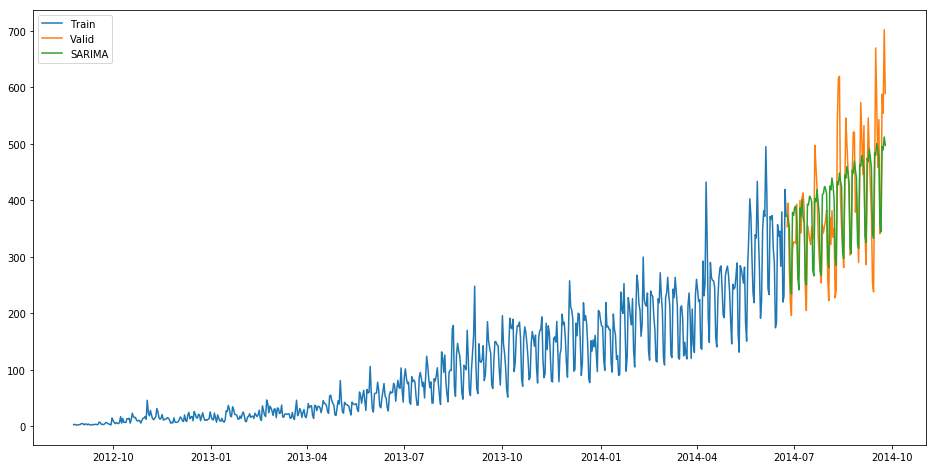

In [38]:
import statsmodels.api as sm
y_hat_avg = valid.copy() 
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(4, 0, 4),seasonal_order=(3,1,4,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

In [266]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_sarimax = sm.tsa.statespace.SARIMAX(Train.Count, order=(4, 0, 4),seasonal_order=param).fit() 
        model_sarimax_fit = model_sarima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

SyntaxError: invalid syntax (<ipython-input-266-4d1b6a430b9a>, line 6)

In [ ]:
check_prediction_diff(SARIMA_predict_diff, valid)

In [258]:
rms = sqrt(mean_squared_error(valid.Count,pre)) 
print(rms)

103.96349857370865


In [219]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)
test['prediction']=predict
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 


In [221]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')